In [31]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

# load local model file and initialize model class
from model import ModelClass
model = ModelClass() # set a few number of periods.


par = model.par
sol = model.sol
sim = model.sim

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [32]:
df = pd.read_csv('Data/formue_cohort.csv')
df = df[(df['KOEN']==1) & (df['ALDER']<100)]

In [33]:
s_data = np.array(df['FGCX'])
a_data = np.array(df['nettoform_u_pf'])

In [34]:
file_path = 'Data/salary_hours.xlsx'
data = pd.read_excel(file_path)

h_data = np.array(data["gender"].iloc[2:]) / 1924

In [35]:
model.solve()

In [36]:
def obj_func(theta,theta_names,mom_data,model,do_print=False):
    
    # printing
    if do_print: 
        print_str = ''
        for i,name in enumerate(theta_names):
            print_str += f'{name}={theta[i]:2.3f} '
        print(print_str)
            
    # calculate moments from simulation
    mom_sim = simulate_moments(theta,theta_names,model)
   
    # equal weighting
    obj = np.sum((mom_data - mom_sim[:35])**2)
    if do_print: 
        print("error", obj)
    
    # return objective and moments for plotting
    return obj

def simulate_moments(theta,theta_names,model):
        
    # update parameters
    for i,name in enumerate(theta_names):
        setattr(model.par,name,theta[i])
    
    # solve and simulate model with these parameters
    model.solve()
    model.simulate()
    
    # return moments from simulated data
    return moment_func(model.sim)

def moment_func(input_data):
    return np.mean(input_data.h,axis=0) # age profile of wealth

In [37]:
theta_names = ("beta", "sigma", "gamma", "mu")

In [38]:
# call numerical optimizer
objective = lambda theta: obj_func(theta,theta_names,h_data,model,do_print=True)

theta_init = np.array([par.beta,par.sigma, par.gamma, par.mu]) 

res = minimize(objective,theta_init,method='trust-constr',bounds=[(0.0, 1.0), (0.1, 6.0), (0.1, 6.0), (0.0, 5.0)], tol=1e-6, options= {"maxiter":10000})
res

beta=0.970 sigma=1.037 gamma=1.140 mu=1.367 
error 0.04243041438387547
beta=0.970 sigma=1.037 gamma=1.140 mu=1.367 
error 0.04243049618671039
beta=0.970 sigma=1.037 gamma=1.140 mu=1.367 
error 0.04243047590416955
beta=0.970 sigma=1.037 gamma=1.140 mu=1.367 
error 0.04243042066974654
beta=0.970 sigma=1.037 gamma=1.140 mu=1.367 
error 0.04243042275600439
beta=0.531 sigma=0.752 gamma=1.153 mu=1.358 
error 3.8416600026900336
beta=0.531 sigma=0.752 gamma=1.153 mu=1.358 
error 3.8416600026900336
beta=0.531 sigma=0.752 gamma=1.153 mu=1.358 
error 3.8416600026900336
beta=0.531 sigma=0.752 gamma=1.153 mu=1.358 
error 3.8416600026900336
beta=0.531 sigma=0.752 gamma=1.153 mu=1.358 
error 3.8416600026900336
beta=0.816 sigma=0.853 gamma=1.115 mu=1.343 
error 3.8416600026900336
beta=0.816 sigma=0.853 gamma=1.115 mu=1.343 
error 3.8416600026900336
beta=0.816 sigma=0.853 gamma=1.115 mu=1.343 
error 3.8416600026900336
beta=0.816 sigma=0.853 gamma=1.115 mu=1.343 
error 3.8416600026900336
beta=0.816 sigm

e:\Anaconda\lib\site-packages\scipy\optimize\_differentiable_functions.py:231: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  self.H.update(self.x - self.x_prev, self.g - self.g_prev)


error 3.84058815740541
beta=0.894 sigma=0.943 gamma=1.123 mu=1.352 
error 3.84058815740541
beta=0.894 sigma=0.943 gamma=1.123 mu=1.352 
error 3.84058815740541
beta=0.894 sigma=0.943 gamma=1.123 mu=1.352 
error 3.84058815740541
beta=0.894 sigma=0.943 gamma=1.123 mu=1.352 
error 3.84058815740541
beta=0.938 sigma=0.996 gamma=1.132 mu=1.360 
error 1.1756816890078836
beta=0.938 sigma=0.996 gamma=1.132 mu=1.360 
error 1.1756818974654455
beta=0.938 sigma=0.996 gamma=1.132 mu=1.360 
error 1.1756809949661822
beta=0.938 sigma=0.996 gamma=1.132 mu=1.360 
error 1.1756819258014013
beta=0.938 sigma=0.996 gamma=1.132 mu=1.360 
error 1.1756815748347031
beta=0.954 sigma=1.017 gamma=1.136 mu=1.363 
error 0.21264904856241945
beta=0.954 sigma=1.017 gamma=1.136 mu=1.363 
error 0.212649044193177
beta=0.954 sigma=1.017 gamma=1.136 mu=1.363 
error 0.21264849254357657
beta=0.954 sigma=1.017 gamma=1.136 mu=1.363 
error 0.21264889524662228
beta=0.954 sigma=1.017 gamma=1.136 mu=1.363 
error 0.21264891558214258
be

           message: `xtol` termination condition is satisfied.
           success: True
            status: 2
               fun: 0.016300987599480895
                 x: [ 9.257e-01  1.027e+00  1.107e+00  1.405e+00]
               nit: 97
              nfev: 175
              njev: 35
              nhev: 0
          cg_niter: 129
      cg_stop_cond: 4
              grad: [ 2.507e+00  3.702e+00  2.495e+00  1.867e+00]
   lagrangian_grad: [ 1.370e-02  1.680e+00  1.230e+00  1.178e+00]
            constr: [array([ 9.257e-01,  1.027e+00,  1.107e+00,  1.405e+00])]
               jac: [<4x4 sparse matrix of type '<class 'numpy.float64'>'
                    	with 4 stored elements in Compressed Sparse Row format>]
       constr_nfev: [0]
       constr_njev: [0]
       constr_nhev: [0]
                 v: [array([-2.494e+00, -2.022e+00, -1.264e+00, -6.884e-01])]
            method: tr_interior_point
        optimality: 1.6797672449516665
  constr_violation: 0.0
    execution_time: 3334.7293872

In [39]:
mom_sim = simulate_moments(res.x,theta_names,model)

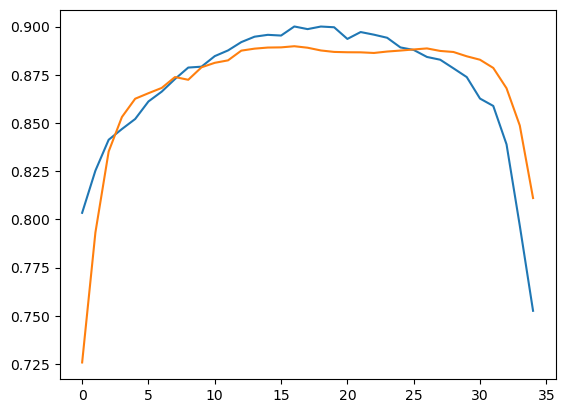

In [40]:
plt.plot(h_data)
plt.plot(mom_sim[:35])